In [1]:
import matplotlib
%matplotlib inline
from apollinaire.psd import series_to_psd
plt.rcParams['font.size'] =35

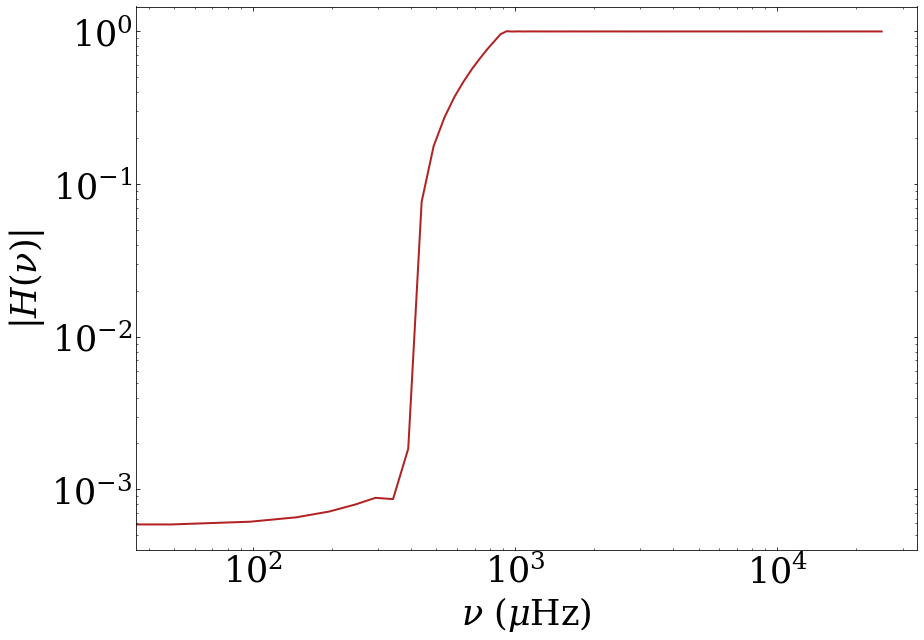

In [2]:
import apollinaire as apn
filt = apn.processing.design_digital_filter (plot_response=True)
plt.savefig ('transfer_function.pdf')

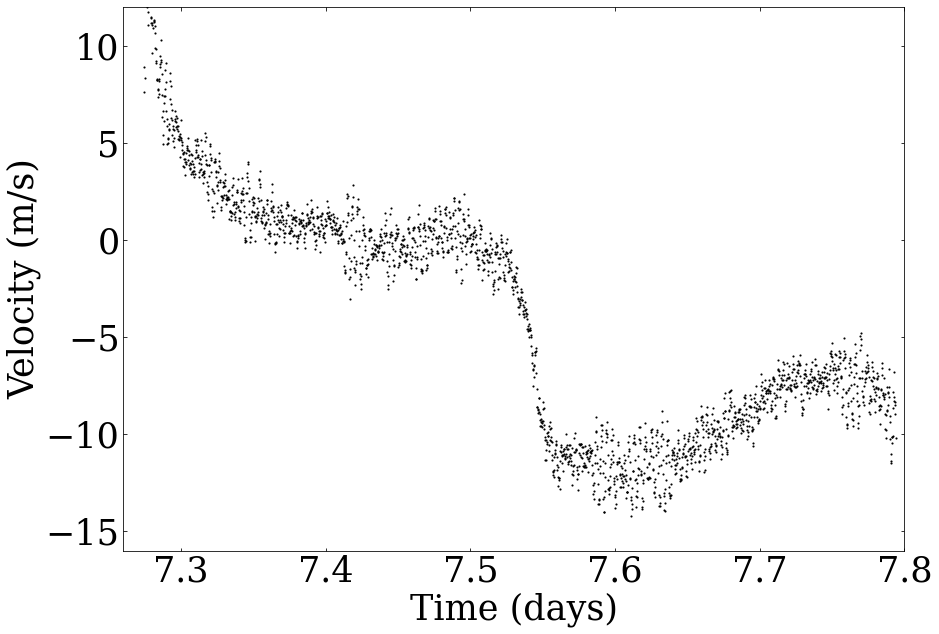

In [3]:
data = np.loadtxt ('solar_song_20180527_20180722_nofilter_d20_corrected_full_pipeline.dat')
t_song = data[:,0]
t_song = (t_song - t_song[0]) - 8
song = data[:,1]

fig = plt.figure (figsize=(14, 10))
ax = fig.add_subplot (111)

ax.set_xlabel ('Time (days)')
ax.set_ylabel ('Velocity (m/s)')
ax.scatter (t_song[song!=0], song[song!=0], color='black', s=5)

ax.set_xlim (7.26, 7.8)
ax.set_ylim (-16, 12)

plt.savefig ('daily_trend_example.pdf')

In [4]:
plt.rcParams['font.size'] =20
data = np.loadtxt ('solar_song_20180603_20180702_f800_d20_corrected_full_pipeline.dat')
t_song = data[:,0]
t_song = (t_song - t_song[0])
song = data[:,1]
data = np.loadtxt ('subserie_golf_030618_0600_030718_0600.dat')
t_golf = data[:,0] / 86400 + 0.25
golf = data[:,1]
data = np.loadtxt ('subserie_mw_golf_030618_0600_030718_0600.dat')
t_golf_wdw = data[:,0] / 86400 + 0.25
golf_wdw = data[:,1]

dc_song = song[song!=0].size / song.size
print (dc_song)

f_song, psd_song = series_to_psd (song, dt=20, correct_dc=True)
f_golf, psd_golf = series_to_psd (golf, dt=60, correct_dc=True)
f_golf_wdw, psd_golf_wdw = series_to_psd (golf_wdw, dt=60, correct_dc=True)

0.4701929012345679


10.6 12.1


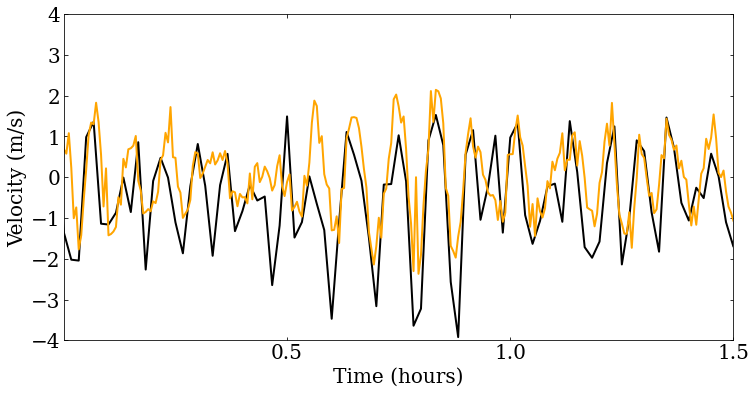

In [5]:
fig = plt.figure (figsize=(12, 6.))
ax1 = fig.add_subplot (111)

ax1.set_xlabel ('Time (hours)')
ax1.set_ylabel ('Velocity (m/s)')

#ticks = np.array (list (range (0,2)))
ticks = np.array ([0.5, 1, 1.5])
ax1.set_xticks (ticks)
ax1.set_xticklabels (ticks)

start = 10.6
stop = 12.1  

print (start, stop)

ax1.plot (t_golf * 24 - start, golf, color='black', linewidth=2)
ax1.plot (t_song * 24 - start, song, color='orange', linewidth=2.)

ax1.set_xlim (0, stop-start)
ax1.set_ylim (-4, 4)

plt.savefig ('song_golf_hours.pdf', format='pdf')

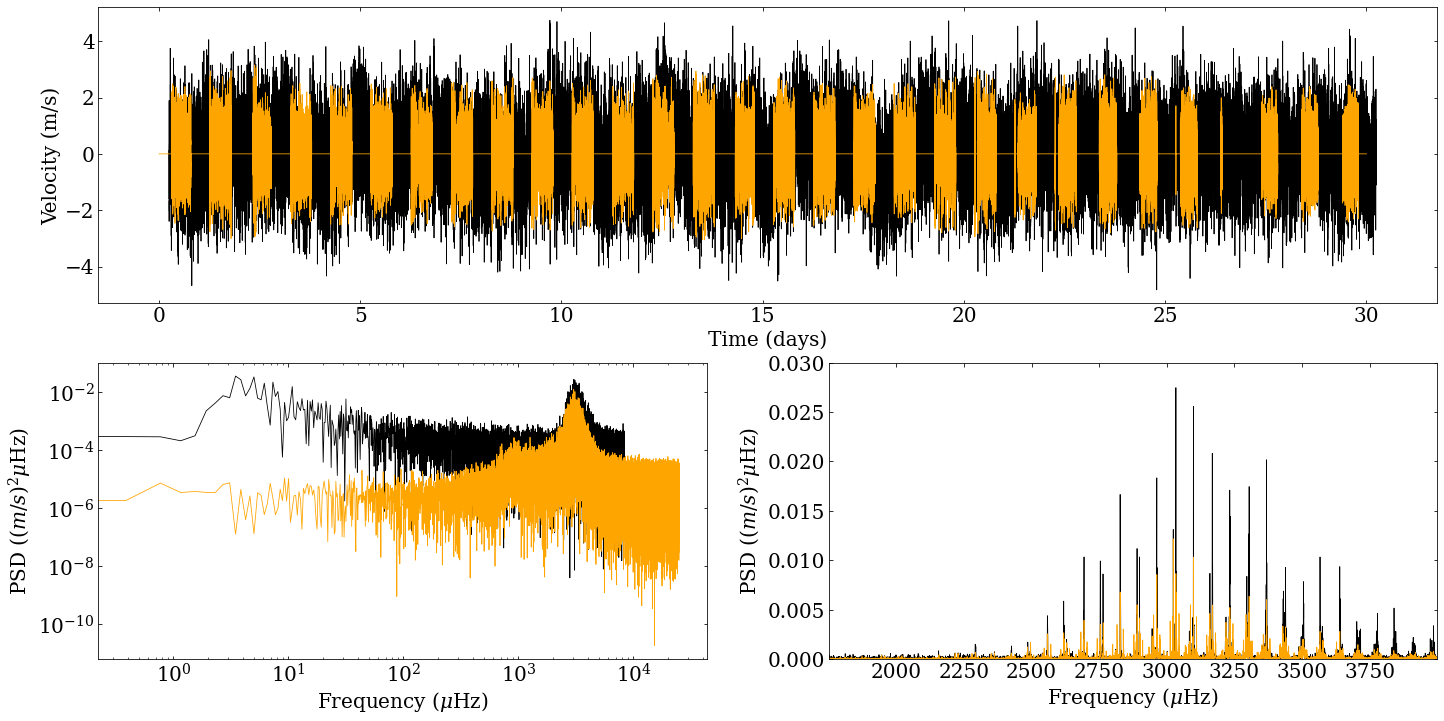

In [6]:
fig = plt.figure (figsize=(24, 12))
ax1 = fig.add_subplot (211)
ax2 = fig.add_subplot (223)
ax3 = fig.add_subplot (224)
ax1.set_xlabel ('Time (days)')
ax2.set_xlabel (r'Frequency ($\mu$Hz)')
ax3.set_xlabel (r'Frequency ($\mu$Hz)')
ax1.set_ylabel ('Velocity (m/s)')
ax2.set_ylabel (r'PSD ($(m/s)^2\mu$Hz)')
ax3.set_ylabel (r'PSD ($(m/s)^2\mu$Hz)')
ax3.set_xlim (1750, 4000)
ax3.set_ylim (0.0, 0.030)
ticks = np.array (list (range (8))) * 250 + 2000
ax3.set_xticks (ticks)
ax3.set_xticklabels (ticks)

ax2.set_xscale ('log')
ax2.set_yscale ('log')


ax1.plot (t_golf, golf, color='black')
ax2.plot (f_golf*1e6, psd_golf*1e-6, color='black')
ax3.plot (f_golf*1e6, psd_golf*1e-6, color='black')

ax1.plot (t_song, song, color='orange')
ax2.plot (f_song*1e6, psd_song*1e-6, color='orange')
ax3.plot (f_song*1e6, psd_song*1e-6, color='orange')

plt.savefig ('song_golf_summer_2018.pdf', format='pdf')

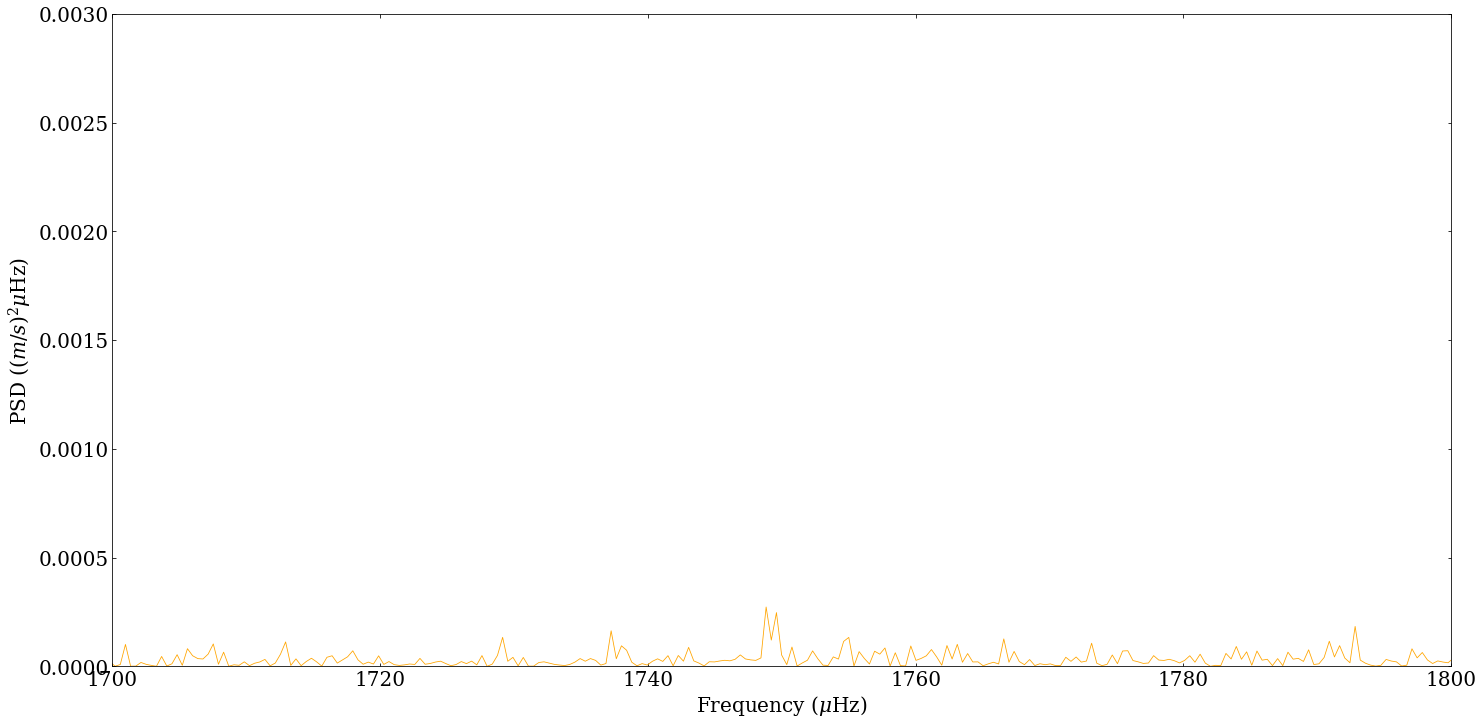

In [7]:
fig = plt.figure (figsize=(24, 12))
ax = fig.add_subplot (111)


ax.set_xlabel (r'Frequency ($\mu$Hz)')

ax.set_ylabel (r'PSD ($(m/s)^2\mu$Hz)')
ax.set_xlim (1700, 1800)

ax.set_ylim (0.0, 0.003)

#ticks = np.array (list (range (8))) * 250 + 2000
#ax.set_xticks (ticks)
#ax.set_xticklabels (ticks)


#ax.plot (f_golf*1e6, psd_golf*1e-6, color='black')
ax.plot (f_song*1e6, psd_song*1e-6, color='orange')

plt.savefig ('golf_summer_2018_order_16.pdf', format='pdf')

In [8]:
print (np.mean (psd_golf[(f_golf>1e-3)&(f_golf<1.5e-3)]) * 1e-6)
print (np.mean (psd_song[(f_song>1e-3)&(f_song<1.5e-3)]) * 1e-6)

0.00010379825729996685
2.914914842960409e-05


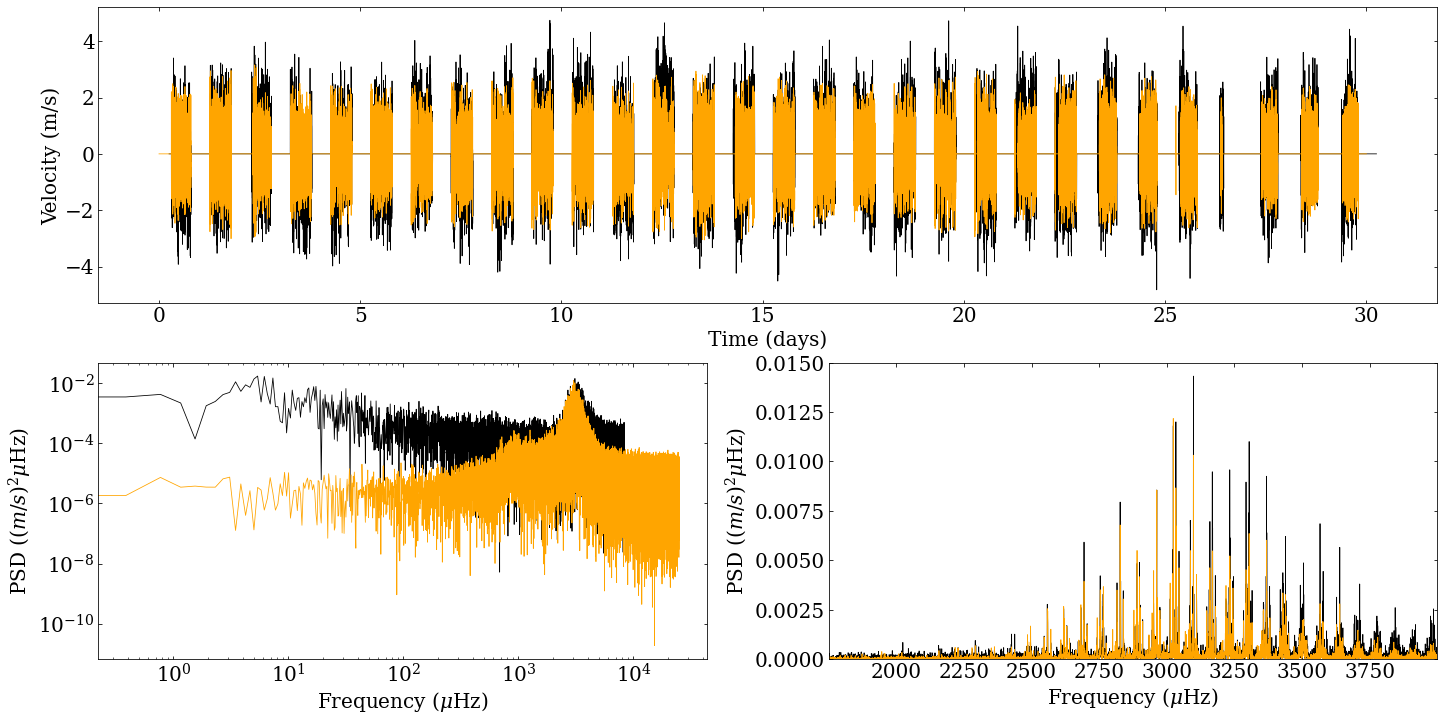

In [9]:
fig = plt.figure (figsize=(24, 12))
ax1 = fig.add_subplot (211)
ax2 = fig.add_subplot (223)
ax3 = fig.add_subplot (224)
ax1.set_xlabel ('Time (days)')
ax2.set_xlabel (r'Frequency ($\mu$Hz)')
ax3.set_xlabel (r'Frequency ($\mu$Hz)')
ax1.set_ylabel ('Velocity (m/s)')
ax2.set_ylabel (r'PSD ($(m/s)^2\mu$Hz)')
ax3.set_ylabel (r'PSD ($(m/s)^2\mu$Hz)')
ax3.set_xlim (1750, 4000)
ax3.set_ylim (0.0, 0.015)
ticks = np.array (list (range (8))) * 250 + 2000
ax3.set_xticks (ticks)
ax3.set_xticklabels (ticks)

ax2.set_xscale ('log')
ax2.set_yscale ('log')

ax1.plot (t_golf_wdw, golf_wdw, color='black')
ax2.plot (f_golf_wdw*1e6, psd_golf_wdw*1e-6, color='black')
ax3.plot (f_golf_wdw*1e6, psd_golf_wdw*1e-6, color='black')


ax1.plot (t_song, song, color='orange')
ax2.plot (f_song*1e6, psd_song*1e-6, color='orange')
ax3.plot (f_song*1e6, psd_song*1e-6, color='orange')



plt.savefig ('song_golf_wdw_summer_2018.pdf', format='pdf')

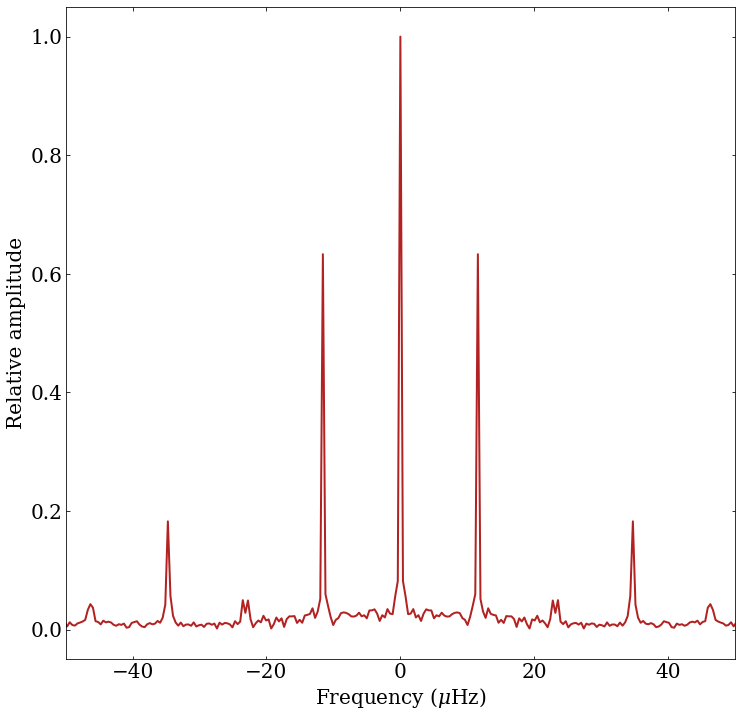

In [10]:
wdw = (song!= 0).astype (np.int_)
tf_wdw = np.fft.fft (wdw) / wdw.size
nu = np.fft.fftfreq (wdw.size, d=20)
norm = np.abs (tf_wdw[0])
ind = np.argsort (nu)
nu = nu[ind]
tf_wdw = tf_wdw[ind]

fig = plt.figure (figsize=(12, 12))
ax1 = fig.add_subplot (111)
ax1.set_xlabel (r'Frequency ($\mu$Hz)')
ax1.set_ylabel (r'Relative amplitude')
ax1.set_xlim (-50, 50)


ax1.plot (nu*1e6, np.abs (tf_wdw) / norm, linewidth=2, color='firebrick')
#ax1.axhline(y=0.1, linestyle='--')

plt.savefig ('tf_song_wdw.pdf', format='pdf')


In [11]:
back = np.loadtxt ('background_golf.dat')
wdw = (golf_wdw!= 0).astype (np.int_)
#pkb_golf = np.loadtxt ('pkb/summary_golf_2018.pkb')
#pkb_golf_wdw = np.loadtxt ('pkb/summary_golf_wdw_2018.pkb')
pkb_golf = np.loadtxt ('pkb/golf_2018_clean.pkb')
pkb_golf_wdw = np.loadtxt ('pkb/golf_wdw_2018_clean.pkb')
#pkb_song = np.loadtxt ('pkb/summary_solar_song_2018.pkb')
pkb_song = np.loadtxt ('pkb/solar_song_clean.pkb')

pkb_golf = pd.DataFrame (data=pkb_golf)
pkb_golf_wdw = pd.DataFrame (data=pkb_golf_wdw)
pkb_song = pd.DataFrame (data=pkb_song)

pkb_golf = pkb_golf.set_index (pkb_golf[0])
pkb_golf_wdw = pkb_golf_wdw.set_index (pkb_golf_wdw[0])
pkb_song = pkb_song.set_index (pkb_song[0])

pkb_golf = pkb_golf.sort_index ()
pkb_golf_wdw = pkb_golf_wdw.sort_index ()
pkb_song = pkb_song.sort_index ()

        0    1            2         3         4         5         6         7     8    9    10   11   12   13
0                                                                                                            
20.0  20.0  2.0  3024.691135  0.303921  0.007541  0.009127  1.549232  0.705186  90.0  0.0  0.0  0.0  0.0  0.0
21.0  21.0  0.0  3033.758366  0.192409  0.024266  0.032680  0.784423  0.411263  90.0  0.0  0.0  0.0  0.0  0.0
        0    1            2         3         4         5         6         7     8    9    10   11   12   13
0                                                                                                            
20.0  20.0  2.0  3024.140505  0.260029  0.008037  0.007748  1.179711  0.492713  90.0  0.0  0.0  0.0  0.0  0.0
21.0  21.0  0.0  3033.664516  0.202540  0.013973  0.023274  0.556275  0.415464  90.0  0.0  0.0  0.0  0.0  0.0
[[  1.           0.        ]
 [  0.37202227  11.57407407]
 [  0.03507458  34.72222222]
 [  0.03507458 -34.72222222]
 [  

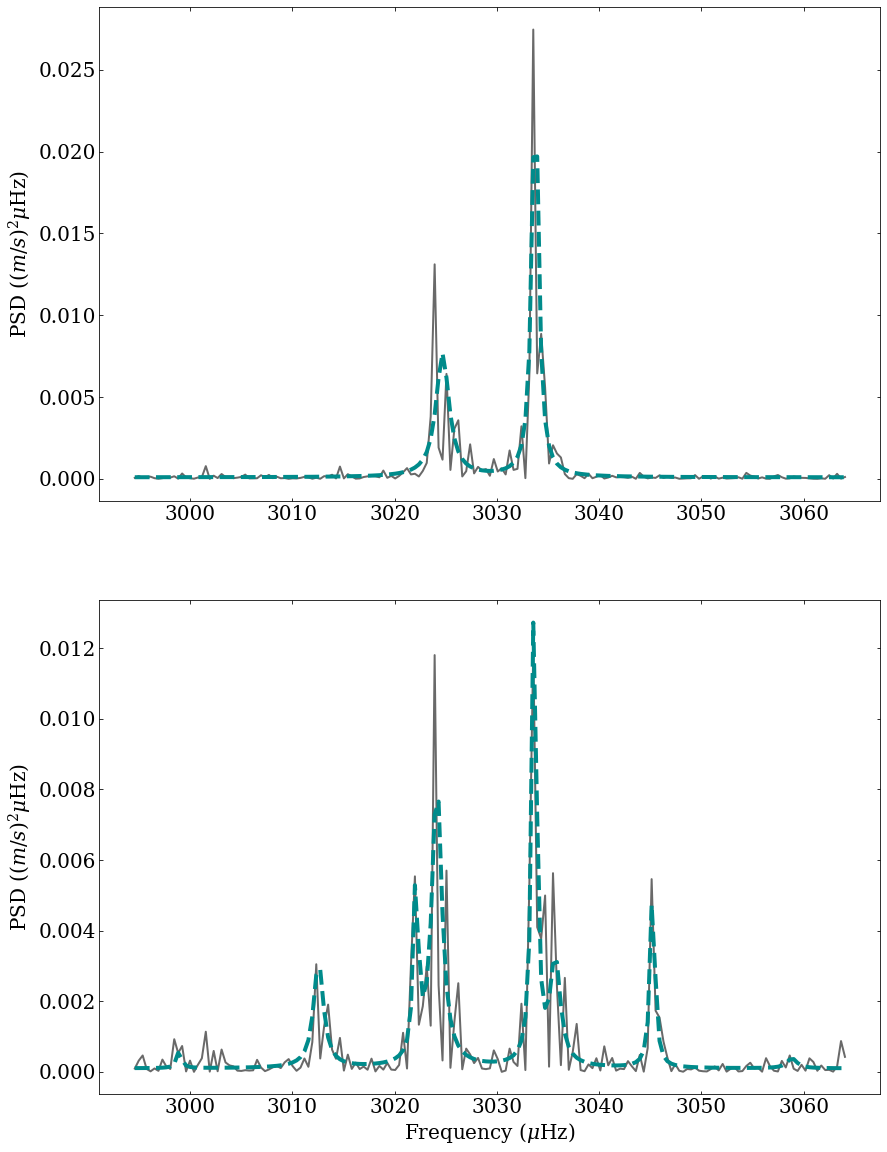

In [12]:
from apollinaire.peakbagging import *

n = 21
la = 0
lb = 2
#aux_pkb_golf = pkb_golf.loc[(pkb_golf.index==n)&((pkb_golf[1]==la)|((pkb_golf[1]==lb)))]
#aux_pkb_golf_wdw = pkb_golf_wdw.loc[(pkb_golf_wdw.index==n)&((pkb_golf_wdw[1]==la)|((pkb_golf_wdw[1]==lb)))]

aux_pkb_golf = pkb_golf.loc[((pkb_golf.index==n)&(pkb_golf[1]==la))|((pkb_golf[1]==lb) & (pkb_golf.index==n-1))]
aux_pkb_golf_wdw = pkb_golf_wdw.loc[((pkb_golf_wdw.index==n)&(pkb_golf_wdw[1]==la))|((pkb_golf_wdw[1]==lb) & (pkb_golf_wdw.index==n-1))]

print (aux_pkb_golf.to_string ())
print (aux_pkb_golf_wdw.to_string ())

center_freq = aux_pkb_golf[2].mean ()
size_wdw = 70.
f1 = center_freq - size_wdw /2
f2 = center_freq + size_wdw / 2
cond = (f_golf*1e6>f1)&(f_golf*1e6<f2)

dt = 1/(2*f_golf[-1]*1e6)
param_wdw = sidelob_param (wdw, dt=dt)
print (param_wdw)
model = back + compute_model(f_golf*1e6, aux_pkb_golf.to_numpy(), instr='golf', asym_profile='nigam-kosovichev')
model_wdw = back + compute_model(f_golf*1e6, aux_pkb_golf_wdw.to_numpy (), param_wdw=param_wdw, instr='golf', asym_profile='nigam-kosovichev')

fig = plt.figure (figsize=(14, 20))
ax1 = fig.add_subplot (211)
ax2 = fig.add_subplot (212)
#ax1.set_xlabel (r'Frequency ($\mu$Hz)')
ax2.set_xlabel (r'Frequency ($\mu$Hz)')
ax1.set_ylabel (r'PSD ($(m/s)^2\mu$Hz)')
ax2.set_ylabel (r'PSD ($(m/s)^2\mu$Hz)')

ax1.plot (f_golf[cond]*1e6, psd_golf[cond]*1e-6, color='dimgray', linewidth=2.)
ax1.plot (f_golf[cond]*1e6, model[cond], color='darkcyan', linewidth=4., linestyle='--')

ax2.plot (f_golf[cond]*1e6, psd_golf_wdw[cond]*1e-6, color='dimgray', linewidth=2.)
ax2.plot (f_golf[cond]*1e6, model_wdw[cond], color='darkcyan', linewidth=4., linestyle='--')

plt.savefig ('comparison_mode_golf_wdw.pdf', format='pdf')


In [13]:
#Using extended files
pkb_song = np.loadtxt ('pkb_extended/solar_song_extended.pkb')
pkb_golf = np.loadtxt ('pkb_extended/golf_extended.pkb')
pkb_golf_wdw = np.loadtxt ('pkb_extended/golf_wdw_extended.pkb')

pkb_golf = pd.DataFrame (data=pkb_golf)
pkb_golf_wdw = pd.DataFrame (data=pkb_golf_wdw)
pkb_song = pd.DataFrame (data=pkb_song)

pkb_golf = pkb_golf.set_index (pkb_golf[0])
pkb_golf_wdw = pkb_golf_wdw.set_index (pkb_golf_wdw[0])
pkb_song = pkb_song.set_index (pkb_song[0])

pkb_golf = pkb_golf.sort_index ()
pkb_golf_wdw = pkb_golf_wdw.sort_index ()
pkb_song = pkb_song.sort_index ()

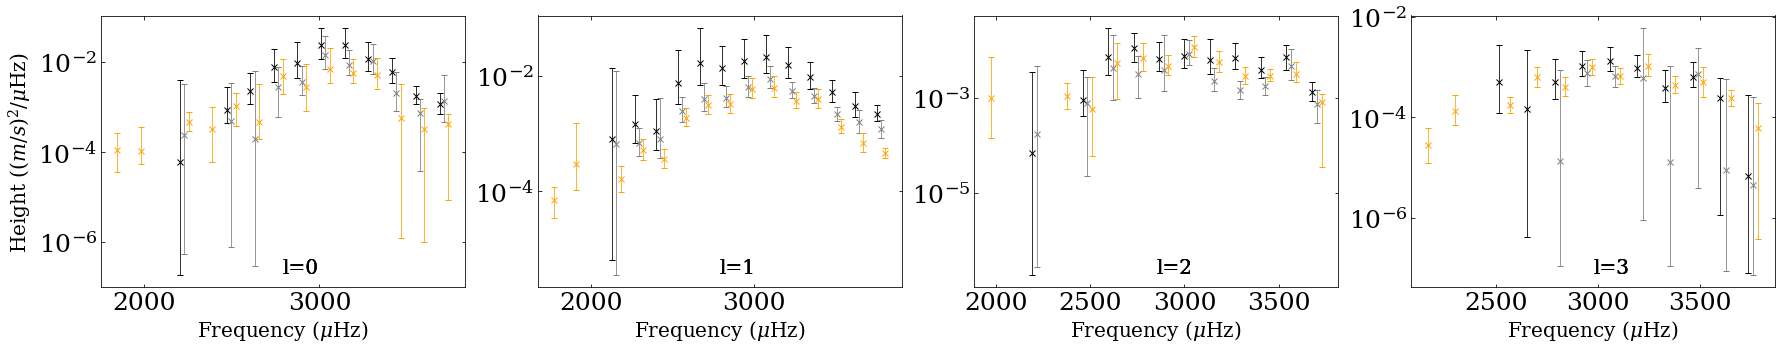

In [133]:
fig, axs = plt.subplots(1, 4, figsize=(30, 5))

pkbs = [pkb_golf, pkb_golf_wdw, pkb_song]


pkb_golf[1] = pkb_golf[1].map (np.int_)
pkb_golf[0] = pkb_golf[0].map (np.int_)

#pkb_golf = pkb_golf.loc[pkb_golf[2] > 1800.]
#pkb_golf_wdw = pkb_golf_wdw.loc[pkb_golf_wdw[2] > 1800.]
#pkb_song = pkb_song.loc[pkb_song[2] > 1800.]

#fmt = ['o', 'p', '*']
fmt = ['x', 'x', 'x']

colors = ['black', 'grey', 'orange']
shifts = [-25, 0, 25]

for l, ax in enumerate (axs) :
    for pkb, fm, color, shift in zip (pkbs, fmt, colors, shifts) :
        #yerr = np.log (pkb.loc[pkb[1]==l, 5] + pkb.loc[pkb[1]==l, 4]) - np.log (pkb.loc[pkb[1]==l, 4])
        #ax.errorbar (x=pkb.loc[pkb[1]==l, 2], y=np.log (pkb.loc[pkb[1]==l, 4]), yerr=yerr, fmt=fm, color=color, capsize=3)
                
        yerr = pkb.loc[pkb[1]==l, 6], pkb.loc[pkb[1]==l, 7]
        ax.errorbar (x=pkb.loc[pkb[1]==l, 2]+shift, y=pkb.loc[pkb[1]==l, 5], yerr=yerr, fmt=fm, color=color, capsize=3)

        ax.set_xlabel (r'Frequency ($\mu$Hz)')
        ax.text (.5, .05, 'l='+str(l), transform=ax.transAxes)
        
        ax.set_yscale ('log')
        
        if l==0 :
            #ax.set_ylabel (r'Height ($\log [(m/s)^2/\mu$Hz])')
            ax.set_ylabel (r'Height ($(m/s)^2/\mu$Hz)')

plt.savefig ('comparison_heights.pdf', format='pdf')

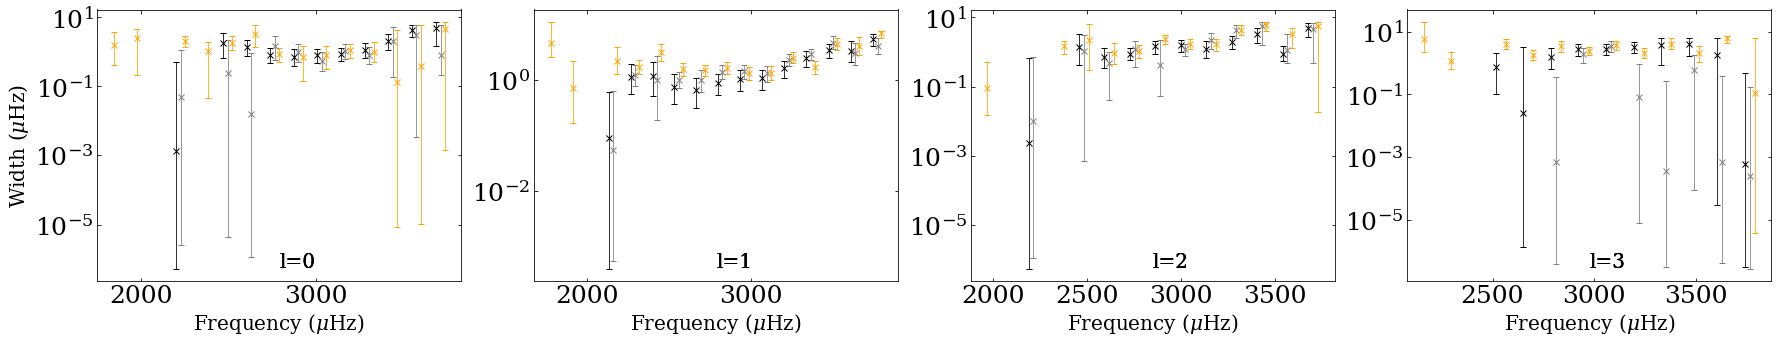

In [134]:
fig, axs = plt.subplots(1, 4, figsize=(30, 5))

pkbs = [pkb_golf, pkb_golf_wdw, pkb_song]
#pkbs = [pkb_golf_wdw, pkb_song]

pkb_golf[1] = pkb_golf[1].map (np.int_)
pkb_golf[0] = pkb_golf[0].map (np.int_)

#pkb_golf = pkb_golf.loc[pkb_golf[2] > 1800.]
#pkb_golf_wdw = pkb_golf_wdw.loc[pkb_golf_wdw[2] > 1800.]
#pkb_song = pkb_song.loc[pkb_song[2] > 1800.]

#fmt = ['o', 'p', '*']
fmt = ['x', 'x', 'x']

colors = ['black', 'grey', 'orange']
shifts = [-25, 0, 25]

for l, ax in enumerate (axs) :
    for pkb, fm, color, shift in zip (pkbs, fmt, colors, shifts) :
        pkb = pkb.loc[pkb[7] < 5]
        
        #yerr = np.log (pkb.loc[pkb[1]==l, 7] + pkb.loc[pkb[1]==l, 6]) - np.log (pkb.loc[pkb[1]==l, 6])
        #ax.errorbar (x=pkb.loc[pkb[1]==l, 2], y=np.log (pkb.loc[pkb[1]==l, 6]), yerr=yerr, fmt=fm, color=color, capsize=3)
        
        yerr = pkb.loc[pkb[1]==l, 9], pkb.loc[pkb[1]==l, 10]
        ax.errorbar (x=pkb.loc[pkb[1]==l, 2]+shift, y=pkb.loc[pkb[1]==l, 8], yerr=yerr, fmt=fm, color=color, capsize=3)
        
        ax.set_yscale ('log')
    
        ax.set_xlabel (r'Frequency ($\mu$Hz)')
        ax.text (.5, .05, 'l='+str(l), transform=ax.transAxes)
        if l==0 :
            #ax.set_ylabel (r'Width ($\log [\mu$Hz])')
            ax.set_ylabel (r'Width ($\mu$Hz)')


plt.savefig ('comparison_widths.pdf', format='pdf')

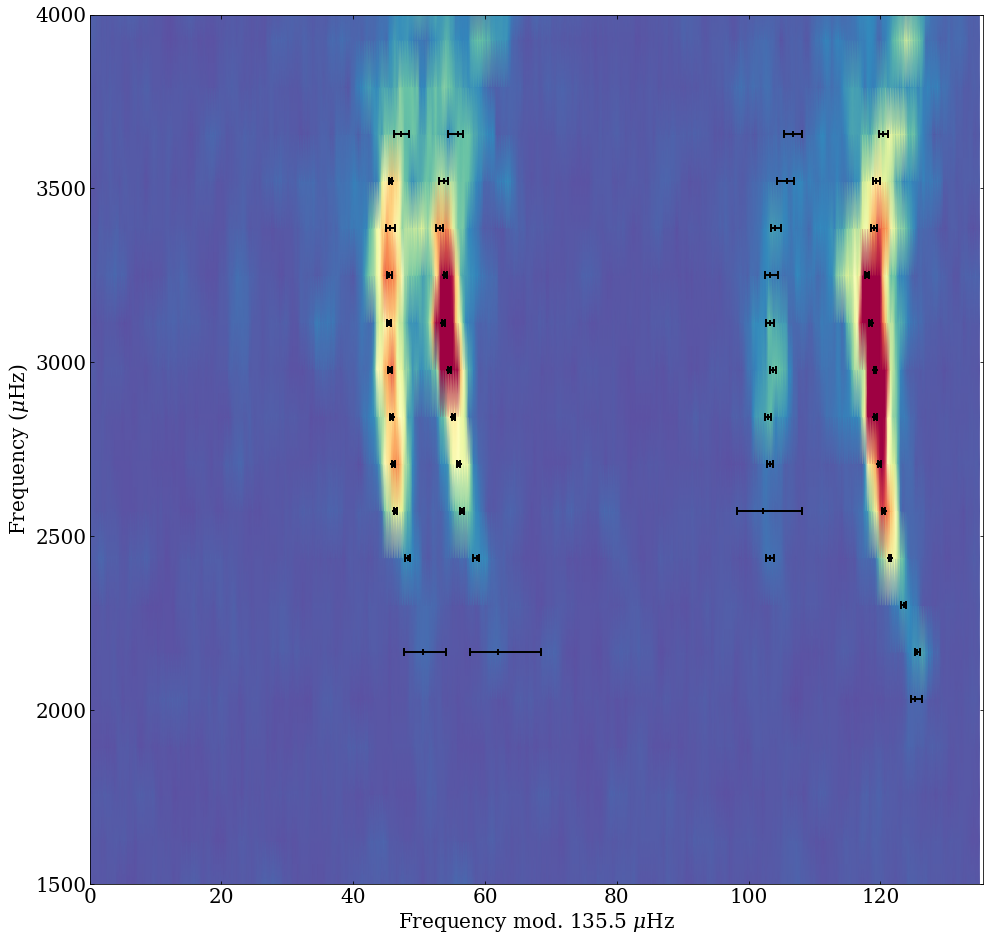

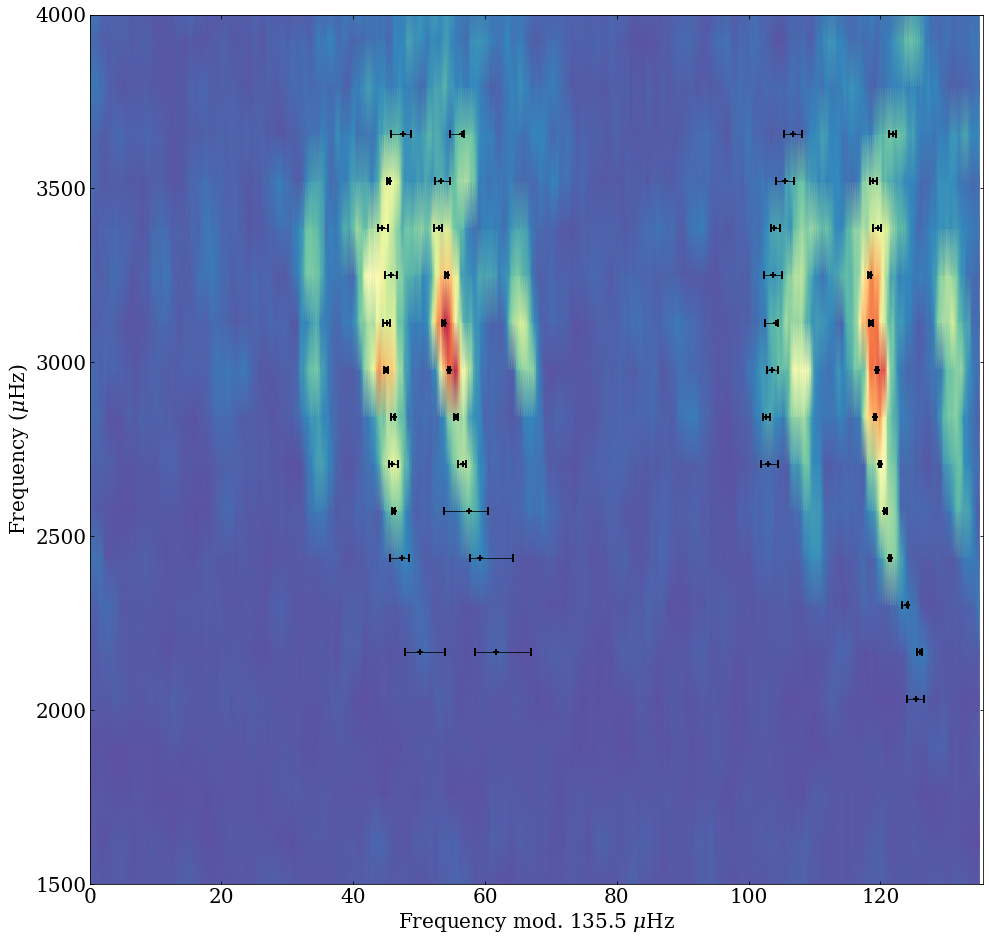

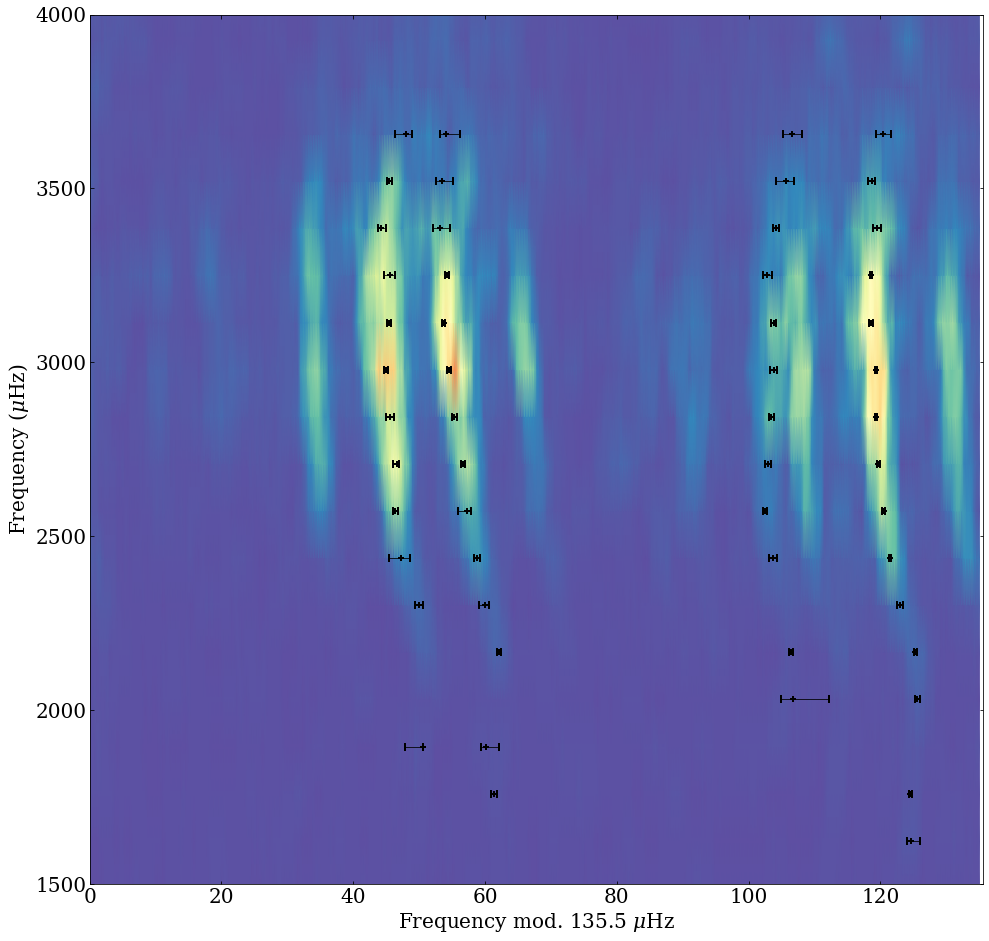

In [16]:
from apollinaire.psd import echelle_diagram

vmin = 0.
vmax = 0.005

dnu = 135.5
smooth = 8
#print (vmin, vmax)
cmap = 'Spectral_r'
shading = 'gouraud'
scatter_color = 'black'
mew = 2
capsize = 4
elinewidth = 2
ms = 1
fmt = '+'

#dnu = pkb_golf.loc[pkb_golf[1]==0, 2].diff().median ()
fig = echelle_diagram (f_golf*1e6, psd_golf*1e-6, dnu, vmin=vmin, vmax=vmax, scatter_color=scatter_color, fmt=fmt, shading=shading,
                       smooth=smooth, cmap=cmap, mode_freq=pkb_golf[2], mode_freq_err=(pkb_golf[3], pkb_golf[4]), 
                       mew=mew, capsize=capsize, elinewidth=elinewidth)
ax = fig.axes[0]
ax.set_xlim (0, dnu)
ax.set_ylim (1500, 4000)

plt.savefig ('ed_golf.png', format='png')

#dnu = pkb_golf_wdw.loc[pkb_golf_wdw[1]==0, 2].diff().median ()
fig = echelle_diagram (f_golf_wdw*1e6, psd_golf_wdw*1e-6, dnu, vmin=vmin, vmax=vmax, scatter_color=scatter_color, shading=shading,
                       smooth=smooth, cmap=cmap, mode_freq=pkb_golf_wdw[2], mode_freq_err=(pkb_golf_wdw[3], pkb_golf_wdw[4]), 
                       mew=mew, capsize=capsize, fmt=fmt)
ax = fig.axes[0]
ax.set_xlim (0, dnu)
ax.set_ylim (1500, 4000)

plt.savefig ('ed_golf_wdw.png', format='png')


#dnu = pkb_song.loc[pkb_song[1]==0, 2].diff().median ()
fig = echelle_diagram (f_song*1e6, psd_song*1e-6, dnu, vmin=vmin, vmax=vmax, scatter_color=scatter_color, shading=shading,
                       smooth=smooth, cmap=cmap, mode_freq=pkb_song[2], mode_freq_err=(pkb_song[3], pkb_song[4]), 
                       mew=mew, capsize=capsize, fmt=fmt)
ax = fig.axes[0]
ax.set_xlim (0, dnu)
ax.set_ylim (1500, 4000)

plt.savefig ('ed_solar_song.png', format='png')


In [126]:
pd.options.display.max_colwidth = 100

def float_exponent_notation(float_number, precision_digits, format_type="g"):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with `precision_digits` digits of
    mantissa precision, printing a normal decimal if an
    exponent isn't necessary.
    """
    e_float = "{0:.{1:d}{}}".format(float_number, precision_digits, format_type)
    if "e" not in e_float:
        return "${}$".format(e_float)
    mantissa, exponent = e_float.split("e")
    cleaned_exponent = exponent.strip("+")
    return "${0} \\times 10^{{{1}}}$".format(mantissa, cleaned_exponent)

def pkb_latex (pkb, quality) :
    pkb = pkb.copy ()
    pkb = pkb[list(range (8))]
    
    pkb[0] = pkb[0].map (np.int_)
    pkb[1] = pkb[1].map (np.int_)
        
    quality['n'] = quality['n'].map (np.int_)
    quality['l'] = quality['l'].map (np.int_)
    
    pkb = pkb.set_index ([0,1])
    quality = quality.set_index (['n', 'l'])
    
    pkb = pkb.join (quality, on=[0,1])
    pkb = pkb.reset_index ()
    
    tab_latex = pkb.to_latex (index=False, header=False)
    return tab_latex


def formatting (extended) :

    txt = '${0:.2f}_{{-{1:.2f}}}^{{+{2:.2f}}}$'
    txt2 = '${0:.2e}_{{-{1:.2e}}}^{{+{2:.2e}}}$'
    
    txt3 = "${0} \\times 10^{{{1}}} ~_{{-{2} \\times 10^{{{3}}}}}^{{+{4} \\times 10^{{{5}}}}}$"
    make_freq = lambda df : txt.format (df[2], df[3], df[4])
    #make_height = lambda df : txt2.format (df[5], df[6], df[7])
    make_height = lambda df : txt3.format ("{0:.{1:d}{2}}".format(df[5], 2, "e").split("e")[0], 
                                           "{0:.{1:d}{2}}".format(df[5], 2, "e").split("e")[1].strip('+').replace('-0', '-'), 
                                           "{0:.{1:d}{2}}".format(df[6], 2, "e").split("e")[0], 
                                           "{0:.{1:d}{2}}".format(df[6], 2, "e").split("e")[1].strip('+').replace('-0', '-'), 
                                           "{0:.{1:d}{2}}".format(df[7], 2, "e").split("e")[0], 
                                           "{0:.{1:d}{2}}".format(df[7], 2, "e").split("e")[1].strip('+').replace('-0', '-'))
    make_width = lambda df : txt.format (df[8], df[9], df[10])

      
    extended['freq'] = extended.apply (make_freq, axis=1)
    extended['height'] = extended.apply (make_height, axis=1)
    extended['width'] = extended.apply (make_width, axis=1)
    
    return extended

def pkb_extended_latex (pkb, quality, filename=None) :
    pkb = pkb.copy ()
    pkb = pkb[list(range (11))]
    
    pkb = pkb.sort_values (2)
    
    pkb[0] = pkb[0].map (np.int_)
    pkb[1] = pkb[1].map (np.int_)
        
    quality['n'] = quality['n'].map (np.int_)
    quality['l'] = quality['l'].map (np.int_)
    
    pkb = pkb.set_index ([0,1])
    quality = quality.set_index (['n', 'l'])
    
    pkb = pkb.join (quality, on=[0,1])
    pkb = pkb.reset_index ()
    
    pkb = formatting (pkb)
    pkb = pkb[[0, 1, 'freq', 'height', 'width', 'ln_K']]
    
    tab_latex = pkb.to_latex (index=False, header=False, escape=False, buf=filename)
    
    return tab_latex

In [127]:
q_golf = pd.read_csv ('quality_assurance/formatted_qa_golf.csv', index_col=0)
q_golf_wdw = pd.read_csv ('quality_assurance/formatted_qa_golf_wdw.csv', index_col=0)
q_song = pd.read_csv ('quality_assurance/formatted_qa_song.csv', index_col=0)
song_extended = np.loadtxt ('pkb_extended/solar_song_extended.pkb')
song_extended = pd.DataFrame (data=song_extended)
golf_extended = np.loadtxt ('pkb_extended/golf_extended.pkb')
golf_extended = pd.DataFrame (data=golf_extended)
golf_wdw_extended = np.loadtxt ('pkb_extended/golf_wdw_extended.pkb')
golf_wdw_extended = pd.DataFrame (data=golf_wdw_extended)

In [128]:
print (pkb_extended_latex (golf_extended, q_song, filename='golf.tex'))

None


In [129]:
print (pkb_extended_latex (golf_wdw_extended, q_song, filename='golf_wdw.tex'))

None


In [130]:
print (pkb_extended_latex (song_extended, q_song, filename='song.tex'))

None


In [22]:
print (pkb_song.to_string ())

        0    1            2         3         4         5         6         7         8         9          10    11   12   13   14   15   16   17   18   19
0                                                                                                                                                          
11.0  11.0  1.0  1749.696467  0.640334  1.381498  0.000069  0.000035  0.000051  4.816203  2.135631   6.678907  90.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
12.0  12.0  0.0  1821.741453  0.481514  0.551285  0.000110  0.000074  0.000150  1.590204  1.166798   2.113451  90.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
12.0  12.0  1.0  1884.915253  0.164198  0.260641  0.000294  0.000188  0.001216  0.727279  0.560364   1.509363  90.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
12.0  12.0  2.0  1946.352198  2.679989  0.124362  0.000981  0.000842  0.005956  0.092781  0.077908   0.435554  90.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
13.0  13.0  0.0  1956.018625  0.832679  1.889904  0.000103  0.00

In [23]:
example_pkb = np.loadtxt ('apollinaire_examples/summary_fit_0000_0365.pkb')
ex = pd.DataFrame (data=example_pkb)
cond = ((ex[0]==20)&(ex[1]==0)) | ((ex[0]==20)&(ex[1]==2))
ex = ex.loc[cond]
print (ex.to_latex (index=False, header=False))
#float_format='{:.2e}'.format)

\begin{tabular}{rrrrrrrrrrrrrr}
\toprule
 20.0 &  2.0 &  2889.568787 &  0.065038 &  0.020987 &  0.005074 &  0.827360 &  0.110073 &  90.0 &  0.0 &  0.386341 &  0.03372 & -0.005241 &  0.007591 \\
 20.0 &  0.0 &  2898.971291 &  0.072483 &  0.012704 &  0.002739 &  1.107145 &  0.128131 &  90.0 &  0.0 &  0.000000 &  0.00000 & -0.023224 &  0.009755 \\
\bottomrule
\end{tabular}



/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning

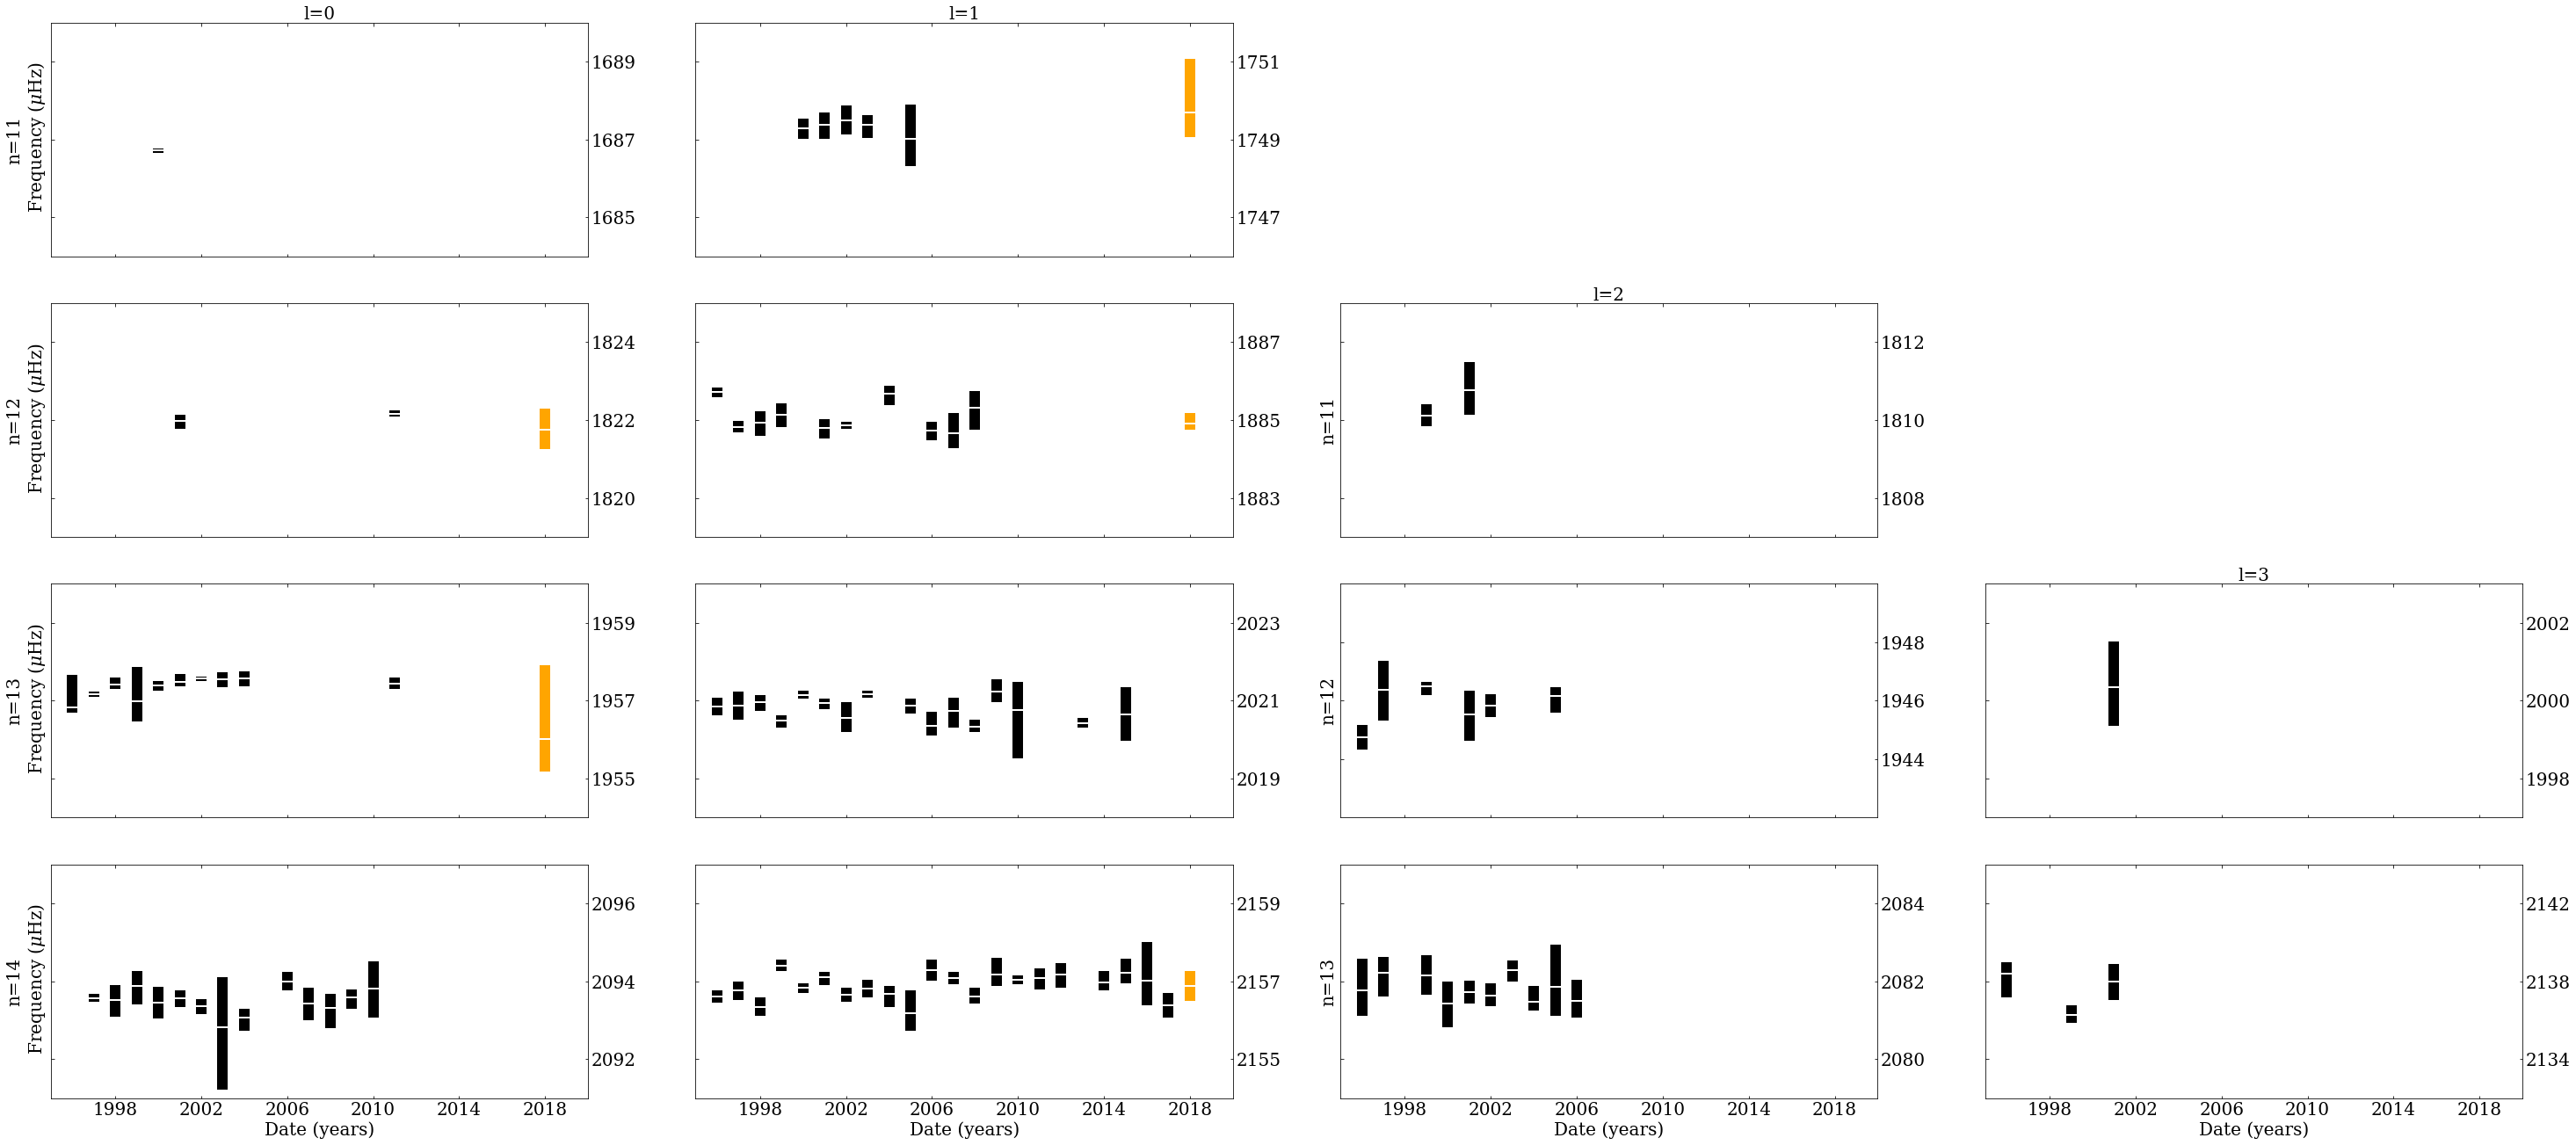

In [24]:
import glob
import matplotlib.ticker as ticker

thresh_err = 2.

#pkb_song = np.loadtxt ('pkb/solar_song_clean.pkb')
#pkb_song = pd.DataFrame (data=pkb_song)
pkb_song = np.loadtxt ('pkb_extended/solar_song_extended.pkb')
pkb_song = pd.DataFrame (data=pkb_song)

list_month = glob.glob ('pkb/pkb_golf_month/summary_extended*.pkb')
list_month.sort ()
years = list (range (1996,2019))

fig, axs = plt.subplots (4, 4, figsize=(42, 20))

x = np.zeros ((4, 4, len (years)))
y = np.zeros ((4, 4, len (years)))
yerr_minus = np.zeros ((4, 4, len (years)))
yerr_plus = np.zeros ((4, 4, len (years)))

for (f, year) in zip (list_month, years) :
    pkb = np.loadtxt (f)
    pkb = pd.DataFrame (data=pkb)
    pkb = pkb.set_index (0)
    for n in range (11, 15) :
        for l in range (4) :
            n_aux = n
            if l > 1 :
                n_aux -= 1
            err_minus = pkb.loc[(pkb[1]==l)&(pkb.index==n_aux), 3]
            err_plus = pkb.loc[(pkb[1]==l)&(pkb.index==n_aux), 4]
            x[n-11, l, year-1996] = year
            if (np.any (err_minus < thresh_err)) & (np.any (err_plus < thresh_err)) :
                v = pkb.loc[(pkb[1]==l)&(pkb.index==n_aux), 2]
                y[n-11, l, year-1996] = v.iloc[0]
                yerr_minus[n-11, l, year-1996] = err_minus.iloc[0]
                yerr_plus[n-11, l, year-1996] = err_plus.iloc[0]
             
                        
for ii in range (4) :
    for l in range (4) :
        axs[ii, l].errorbar (x=x[ii,l, y[ii,l,:]!=0], y=y[ii,l, y[ii,l,:]!=0], 
                             yerr=(yerr_minus[ii,l, y[ii,l,:]!=0], yerr_plus[ii,l, y[ii,l,:]!=0]), 
                             color='white', ecolor='black', capsize=0, markersize=12, elinewidth=12, capthick=0,
                             marker='_', ls='none', mew=2)
        if l < 2 :
            n_aux = ii+11
        else :
            n_aux = ii+10
            
        y_song = pkb_song.loc[(pkb_song[0]==n_aux)&(pkb_song[1]==l), 2]
        err_song_minus = pkb_song.loc[(pkb_song[0]==n_aux)&(pkb_song[1]==l), 3]
        err_song_plus = pkb_song.loc[(pkb_song[0]==n_aux)&(pkb_song[1]==l), 4]
        if (not y_song.empty) & (np.any (err_song_minus < thresh_err)) & (np.any (err_song_plus < thresh_err)) :
            axs[ii, l].errorbar (x=2018, y=y_song, yerr=(err_song_minus, err_song_plus), marker='_', ls='none', mew=2,
                                 color='white', ecolor='orange', capsize=0, markersize=12, elinewidth=12, capthick=0)
        m = np.median (y[ii,l, y[ii,l,:]!=0])
        if ~np.isnan (m) :
            m = round (m)
            axs[ii, l].set_ylim (m-3, m+3)
            axs[ii, l].yaxis.set_major_locator(ticker.FixedLocator([m-2, m , m+2]))
            if ((ii==2)&(l==2)) : 
                axs[ii, l].set_ylim (m-4, m+4)
                axs[ii, l].yaxis.set_major_locator(ticker.FixedLocator([m-2, m , m+2]))
            if ((ii==3)&(l==3)) :
                axs[ii, l].set_ylim (m-6, m+6)
                axs[ii, l].yaxis.set_major_locator(ticker.FixedLocator([m-4, m , m+4]))
                               
for ax in np.ravel (axs) :
    ax.set_xlim (1995, 2020)
    ax.set_xticks (range (1998, 2020, 4))
    ax.yaxis.set_tick_params (labelright=True, labelleft=False)

for ax in np.ravel (axs[:3,:]) :
    ax.set_xticklabels ([])
for ii, ax in enumerate (np.ravel (axs[:,0])) :
    ax.set_ylabel (r'n=' + str (ii+11) + '\n Frequency ($\mu$Hz)')
for ii, ax in enumerate (np.ravel (axs[:,2])) :
    ax.set_ylabel (r'n=' + str (ii+10))
for ii, ax in enumerate (np.ravel (axs[0,:])) :
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel (r'l=' + str(ii))
for ax in np.ravel (axs[3,:]) :
    ax.set_xlabel (r'Date (years)')
    
axs[0,2].remove ()
axs[0,3].remove ()
axs[1,3].remove ()

axs[1,2].xaxis.set_label_position('top') 
axs[1,2].set_xlabel (r'l=2')

axs[2,3].xaxis.set_label_position('top') 
axs[2,3].set_xlabel (r'l=3')

plt.subplots_adjust(left=0.02, right=0.95, top=0.95, bottom=0.1)

plt.savefig ('golf_months.pdf', format='pdf')

In [25]:
list_sub = glob.glob ('subseries/*.dat')
list_sub.sort ()
plt.ion ()

noise_lf = []
for elt in list_sub :
    data = np.loadtxt (elt)
    #fig, ax = plt.subplots (1, 1)
    #ax.plot (data, color='black')
    #print (data[data!=0].size / data.size)
    f, psd = series_to_psd (data, dt=20, correct_dc=True)
    n_lf = np.mean (psd[(f>1e-3)&(f<1.5e-3)])
    noise_lf.append (n_lf)

year = np.array (list (range (1996, 2019)))

data = np.loadtxt ('solar_song_20180603_20180702_f800_d20_corrected_full_pipeline.dat')
song = data[:,1]
data = np.loadtxt ('subserie_golf_030618_0600_030718_0600.dat')
golf = data[:,1]
f_song, psd_song = series_to_psd (song, dt=20, correct_dc=True)
f_golf, psd_golf = series_to_psd (golf, dt=60, correct_dc=True)

n_lf = np.mean (psd_golf[(f_golf>1e-3)&(f_golf<1.5e-3)])
noise_lf.append (n_lf)
noise_lf = np.array (noise_lf)

n_lf_song = np.mean (psd_song[(f_song>1e-3)&(f_song<1.5e-3)])

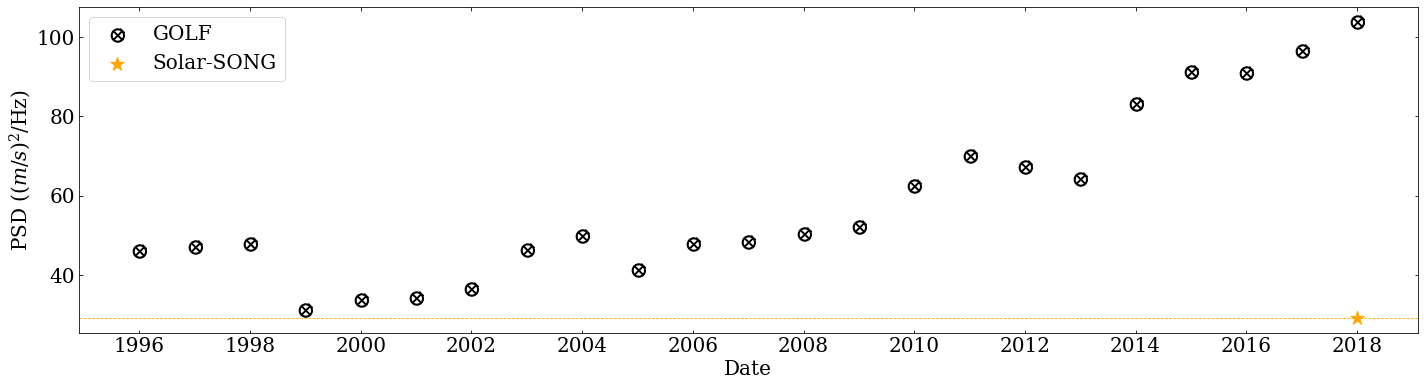

In [26]:
fig, ax = plt.subplots (1, 1, figsize=(24, 6))
ax.scatter (year, noise_lf, color='black', marker=r'$\bigotimes$', s=200, label='GOLF')
ax.scatter (2018, n_lf_song, color='orange', marker='*', s=200, label='Solar-SONG')
ax.axhline (n_lf_song, color='orange', linestyle='--')

ax.set_ylabel (r'PSD ($(m/s)^2$/Hz)')
ax.set_xlabel ('Date')
ax.legend ()

ax.set_xticks (list (range (1996, 2020, 2)))

plt.savefig ('lf_power.pdf', format='pdf')

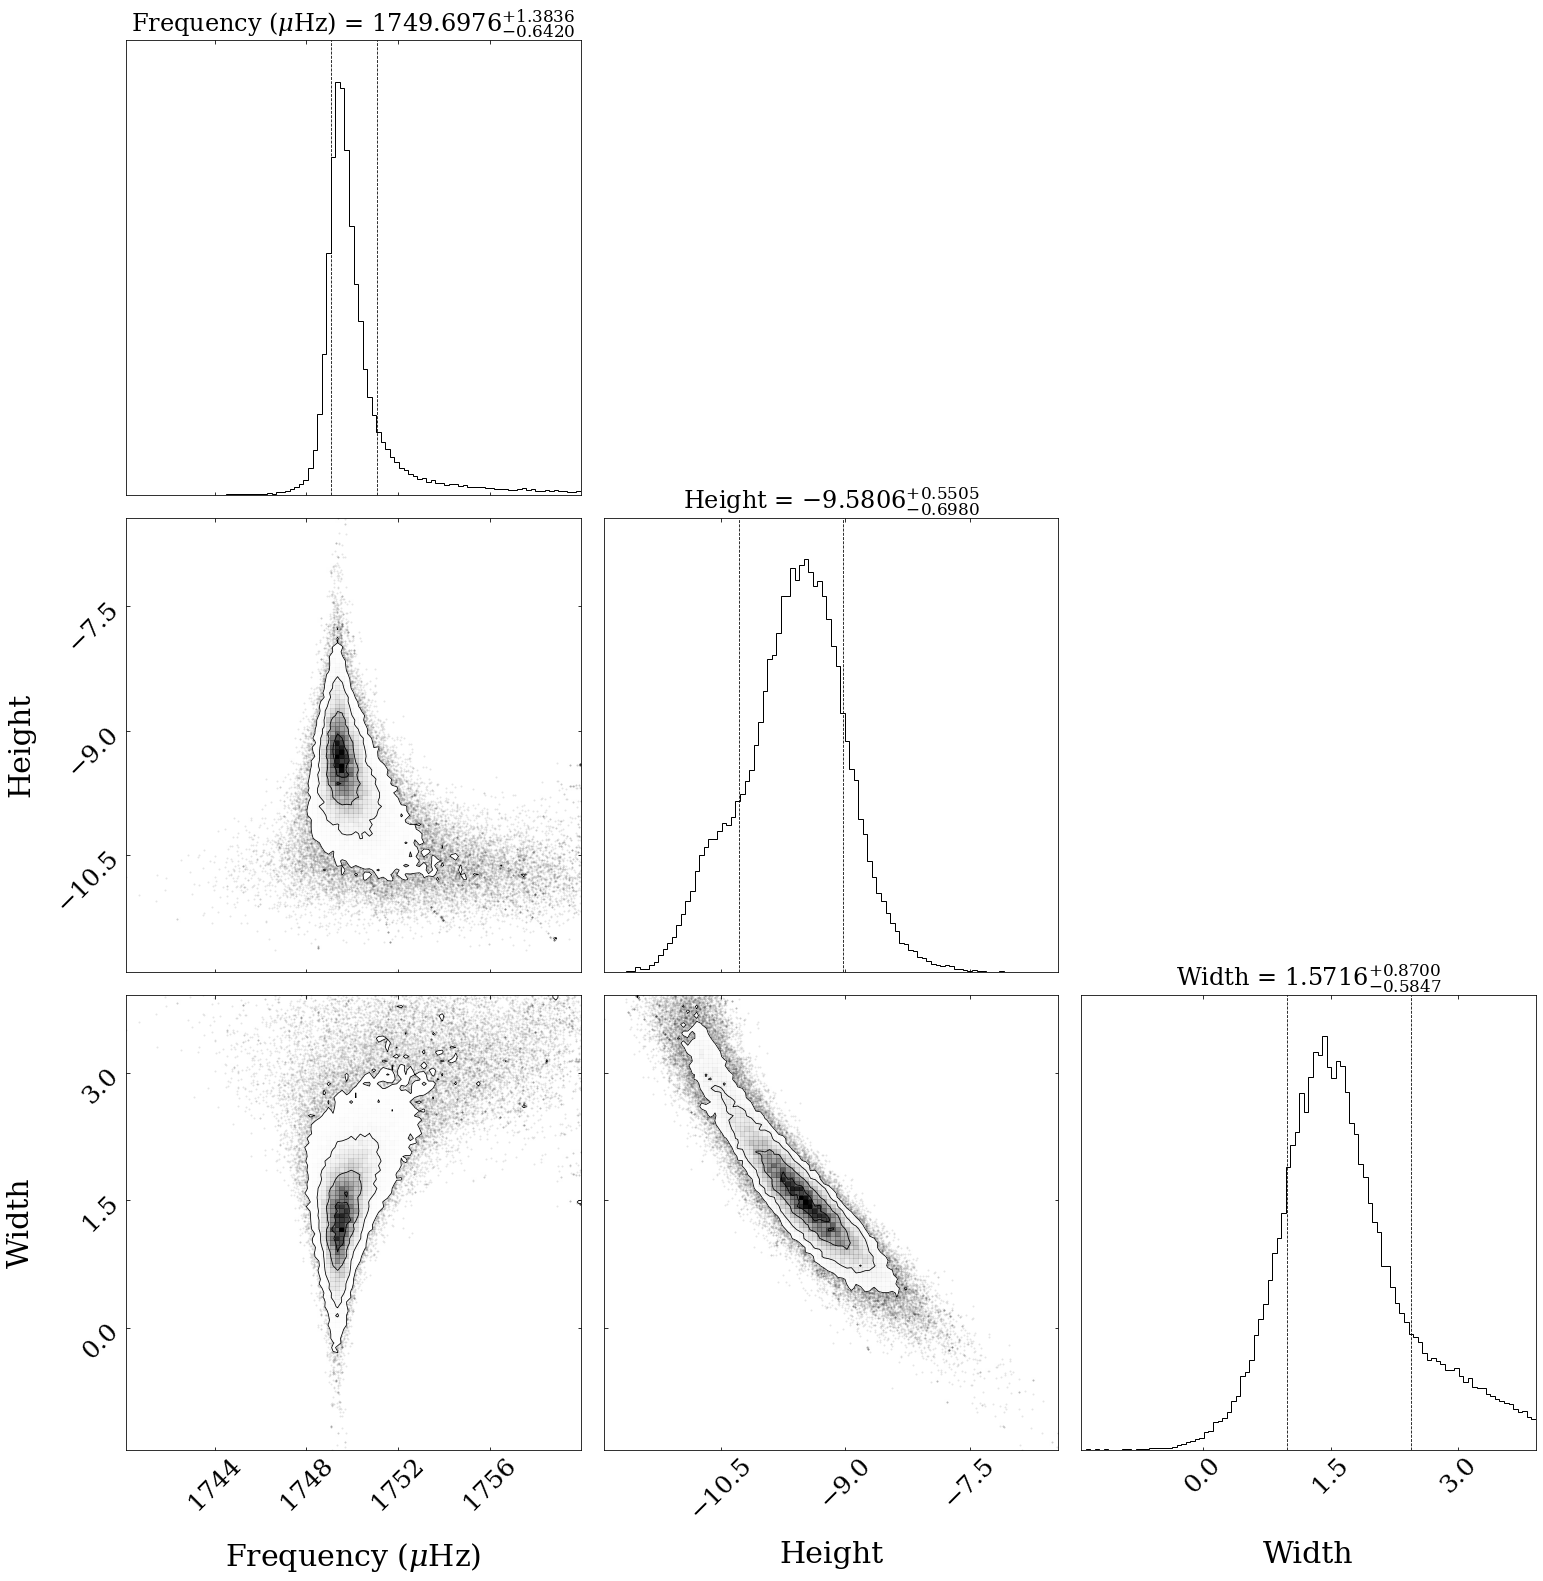

In [27]:
import emcee
import corner
def sort_chain (labels, degrees, flatchain) :

    aux_flat = np.copy (flatchain)

    sort1 = np.argsort (labels)
    labels = labels[sort1]
    degrees = degrees[sort1]
    aux_flat = aux_flat[:,sort1]

    sort2 = np.argsort(degrees)
    labels = labels[sort2]
    degrees = degrees[sort2]
    aux_flat = aux_flat[:,sort2]

    return labels, degrees, aux_flat

thin = 10
discard = 200

file_hdf5 = 'hdf5/solarsong/mcmc_sampler_order_11_degrees_13.h5'
reader = emcee.backends.HDFBackend(file_hdf5, read_only=True)

labels = np.loadtxt (file_hdf5[:len(file_hdf5)-3]+'.dat', dtype=str, usecols=0)
degrees = np.loadtxt (file_hdf5[:len(file_hdf5)-3]+'.dat', dtype=str, usecols=2)
labels = np.char.add (labels, np.full (labels.size, '_', dtype=str))
labels = np.char.add (labels, degrees)
norm = np.loadtxt (file_hdf5[:len(file_hdf5)-3]+'.dat', usecols=1)

flatchain = reader.get_chain(flat=True, thin=thin, discard=discard)
quantiles = [0.16, 0.84]

#print (flatchain.shape[0])

flatchain = flatchain * norm
labels, degrees, flatchain = sort_chain (labels, degrees, flatchain)
flatchain = flatchain[:,:3]


#flatchain [:,2:] = np.exp (flatchain [:,2:])

plt.rcParams['font.size'] = 20.
plt.rcParams['xtick.labelsize'] = 25.
plt.rcParams['ytick.labelsize'] = 25.
labels = [r'Frequency ($\mu$Hz)', 'Height', 'Width']
fig = corner.corner(flatchain, labels=labels, label_kwargs={'fontsize':30}, quantiles=quantiles, 
                    show_titles=True, title_fmt='.4f', bins=100, labelpad=-0.1)
fig.set_size_inches(24,24)

#plt.savefig (file_hdf5[:len(file_hdf5)-3]+'.pdf', format='pdf')
